In [1]:
!pip install yfinance

  Using cached yfinance-0.1.74-py2.py3-none-any.whl (27 kB)
     ---------------------------------------- 3.6/3.6 MB 4.5 MB/s eta 0:00:00
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import yfinance as yf

In [3]:
yf.download("AAPL", start = '2019-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124847,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168354,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366501,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753826,219111200
...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000


#### Practice
1. 각자 한 종목의 데이터를 선택
2. open close high low 컬럽 값들 소수점 둘째자리까지 반올림 유지
3. nan값은 시가 변환
4. 파생변수 생성(종가- 시가) -> 등락폭 생성
5. 등락율( 등락폭/시가 * 100) 파생변수 생성
6. 시가/ 종가/ 등락폭/ 볼륨 데이터 시각홯

In [6]:
data = yf.download("/KO", start = '2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,47.490002,47.540001,46.959999,47.349998,43.020840,10576300
2019-01-02,46.939999,47.220001,46.560001,46.930000,42.639236,11603700
2019-01-03,46.820000,47.369999,46.529999,46.639999,42.375751,14714400
2019-01-04,46.750000,47.570000,46.639999,47.570000,43.220722,13013700
2019-01-07,47.570000,47.750000,46.900002,46.950001,42.657413,13135500


In [11]:
data[["Open","High","Low","Close"]] = data[["Open","High","Low","Close"]].round(2)

In [12]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,47.49,47.54,46.96,47.35,43.020840,10576300
2019-01-02,46.94,47.22,46.56,46.93,42.639236,11603700
2019-01-03,46.82,47.37,46.53,46.64,42.375751,14714400
2019-01-04,46.75,47.57,46.64,47.57,43.220722,13013700
2019-01-07,47.57,47.75,46.90,46.95,42.657413,13135500
...,...,...,...,...,...,...
2022-08-25,64.36,64.71,63.90,64.67,64.669998,7913900
2022-08-26,64.73,64.80,62.98,63.11,63.110001,10086300
2022-08-29,62.69,63.03,62.41,62.73,62.730000,9115900


In [13]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
data["등락폭"] = data["Close"] - data["Open"]
data["등락율"] = data["등락폭"]/data["Open"] * 100

In [16]:
data

,Open,High,Low,Close,Adj Close,Volume,등락폭,등락율
Date,,,,,,,,
2018-12-31,47.49,47.54,46.96,47.35,43.020840,10576300,-0.14,-0.294799
2019-01-02,46.94,47.22,46.56,46.93,42.639236,11603700,-0.01,-0.021304
2019-01-03,46.82,47.37,46.53,46.64,42.375751,14714400,-0.18,-0.384451
2019-01-04,46.75,47.57,46.64,47.57,43.220722,13013700,0.82,1.754011
2019-01-07,47.57,47.75,46.90,46.95,42.657413,13135500,-0.62,-1.303342
...,...,...,...,...,...,...,...,...
2022-08-25,64.36,64.71,63.90,64.67,64.669998,7913900,0.31,0.481666
2022-08-26,64.73,64.80,62.98,63.11,63.110001,10086300,-1.62,-2.502704
2022-08-29,62.69,63.03,62.41,62.73,62.730000,9115900,0.04,0.063806


In [24]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

file_path = "C:/Windows/Fonts/12롯데마트드림MEDIUM_0.TTF"
font = font_manager.FontProperties(fname = file_path).get_name()
rc('font', family=font)

In [25]:
x1 = data["Open"].to_list()
x2 = data["Close"].to_list()
x3 = data["등락폭"].to_list()
x4 = data["Volume"].to_list()

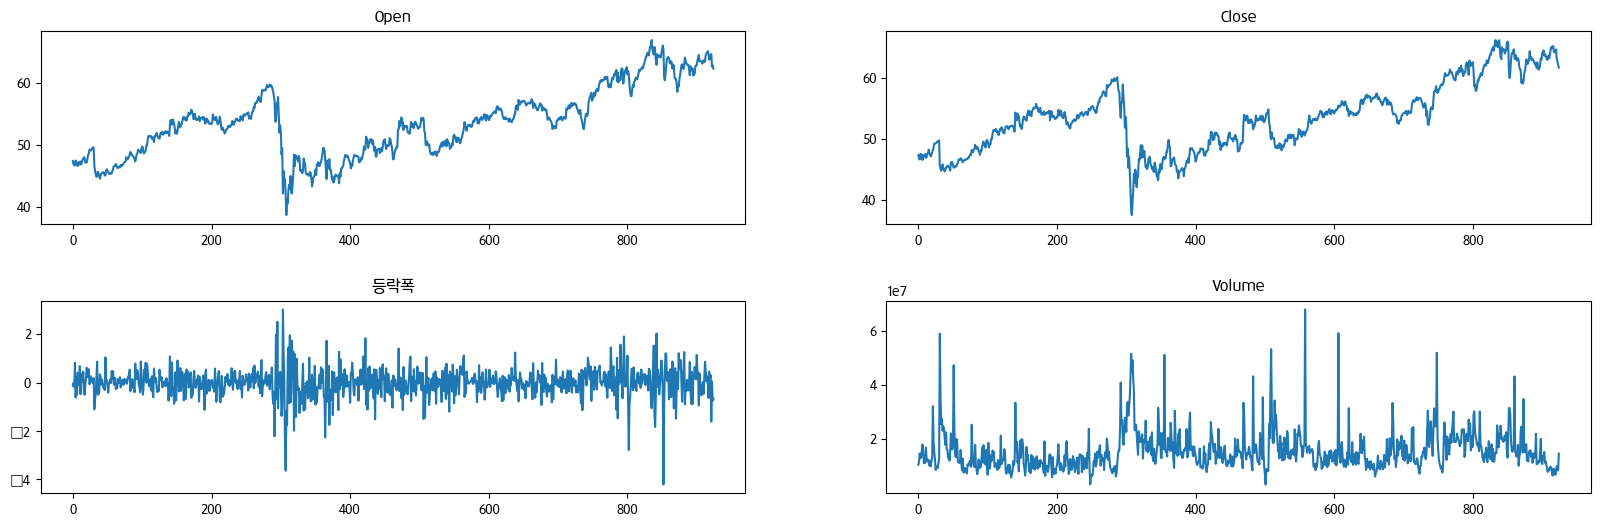

In [41]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.2, hspace=0.4)


plt.subplot(2, 2, 1)
plt.plot(x1)
plt.title("Open")

plt.subplot(2, 2, 2)
plt.plot(x2)
plt.title("Close")

plt.subplot(2, 2, 3)
plt.plot(x3)
plt.title("등락폭")

plt.subplot(2, 2, 4)
plt.plot(x4)
plt.title("Volume")

plt.show()